## Import packages

In [28]:
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torchvision.utils as vutils

In [30]:
import sys
sys.path.append('../')
sys.path.append('../final_code')
sys.path.append('../InfoGAN-PyTorch')
import InfoCS_Solver as infos
import LP_Compressed_Sensing as lcs

## data load

In [31]:
root = './'

errors = pd.read_csv(root+'error.csv')
ori_data = np.loadtxt(root+'ori_img.txt').reshape((150, 784))
con_data = np.loadtxt(root+'constra_img.txt').reshape((150, 784))

me_list = np.array(errors['me'])
re_list = np.array(errors['re'])
num_epoch = np.array(errors['nc'])

In [32]:
re_10 = re_list[:50]
ori_10 = ori_data[:50]
epoch_10 = num_epoch[:50]
con_10 = con_data[:50]
index_10 = np.argsort(re_10)


re_125 = re_list[50:100]
ori_125 = ori_data[50:100]
epoch_125 = num_epoch[50:100]
con_125 = con_data[50:100]
index_125 = np.argsort(re_125)


re_15 = re_list[100:]
ori_15 = ori_data[100:]
epoch_15 = num_epoch[100:]
con_125 = con_data[100:]
index_15 = np.argsort(re_15)

In [113]:
index_me = np.argsort(me_list)
num = np.sum(me_list >= 0.001)

np.mean(me_list[index_me[:-14]])

0.0009611401424883618

In [19]:
np.mean(re_125)

34.27501601106772

In [20]:
np.mean(re_15)

32.809843493404884

In [115]:
np.mean(num_epoch[:50])

10693.88

## error analysis

In [89]:
#reconstruction error
arg_re = np.argsort(re_list)

mean_re = np.mean(re_list)
print("mean: ", mean_re)

# max_nc
max_re = np.max(re_list)
print("max: ", max_re)

#min_nc
min_re = np.min(re_list)
print("min: ", min_re)

arg_re = np.argsort(re_list)

mean:  31.0869403652195
max:  58.69697915484179
min:  13.880774000696467


In [90]:
re_list[45]

20.07371810101554

In [91]:
re_list[27]

36.301301703116444

In [92]:
mean_me = np.mean(me_list)
print("mean: ", mean_me)

# max_nc
max_me = np.max(me_list)
print("max: ", max_me)

#min_nc
min_me = np.min(me_list)
print("min: ", min_me)


mean:  0.0009621008846443146
max:  0.0009995996952056883
min:  0.00015927106142044067


IMAGE
--------

In [104]:
num = 10
index = np.argsort(re_list)
index = index[[14, 16, 17, 1, 30, 31, 42, 43, 46, 68]]


In [105]:
ori_sample = ori_data[index]
con_sample = con_data[index]

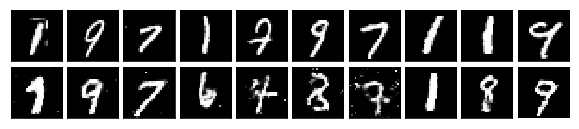

In [106]:
n_col = num
n_row = 2

fig, axes = plt.subplots(figsize=(10, 2), nrows=n_row, ncols=n_col, sharex=True, sharey=True)
plt.subplots_adjust(wspace =0.1, hspace =0.1)

for i in range(n_row):
    for j in range(n_col):
        if i == 0:
            axes[i][j].imshow(ori_sample[j].reshape((28, 28)), cmap='Greys_r')
        #elif i ==1:
        #    axes[i][j].imshow(tar_ini[j].reshape((28, 28)), cmap='Greys_r')
        else:
            axes[i][j].imshow(con_sample[j].reshape((28, 28)), cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig(root+'samples.png')

## data analysis 

In [132]:
min_recover_list = np.argsort(re_list)[:10]

In [133]:
min_recover_list

array([ 8, 14, 42, 26, 18, 40, 11, 22, 29, 35])

In [134]:
np.min(re_list)

13.914270713550197

In [135]:
np.average(re_list)

31.862426584921124

In [136]:
np.average(me_list)

1.9939187679624106

In [129]:
np.argsort(me_list)

array([ 2, 55, 33, 40, 20, 11, 53,  9, 41, 24, 15,  3, 22, 23, 27, 46,  6,
       47,  4, 14, 13, 39,  8, 16, 12, 56,  5, 18, 57, 52, 19, 34, 10, 59,
       21, 26, 48, 51, 49, 31, 38, 35, 37, 25,  1, 30, 54, 36, 17, 45, 42,
        7,  0, 58, 44, 32, 28, 50, 29, 43])

In [137]:
np.mean(np.sort(me_list)[:-1])

0.0009565508906666379

In [138]:
fail = 0
for i in range(len(me_list)):
    if me_list[i] >= 0.01:
        fail+=1
print(fail)

1


## best images

In [145]:
tar_ori = init_data[min_recover_list][-4:]
tar_con = con_list[min_recover_list][-4:]

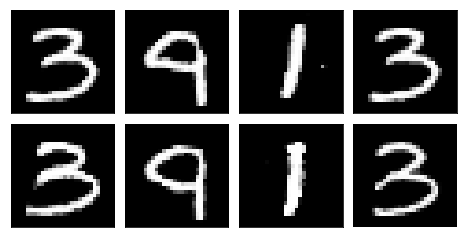

In [147]:
n_col = 4
n_row = 2

fig, axes = plt.subplots(figsize=(8, 4), nrows=n_row, ncols=n_col, sharex=True, sharey=True)
plt.subplots_adjust(wspace =0.1, hspace =0.1)

for i in range(n_row):
    for j in range(n_col):
        if i == 0:
            axes[i][j].imshow(tar_ori[j].reshape((28, 28)), cmap='Greys_r')
        else:
            axes[i][j].imshow(tar_con[j].reshape((28, 28)), cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('./recover_20/best_img.png')

In [22]:
final_calculating_error(tar_con[0], tar_ori[0])

13.90883060932865